In [36]:
#Import Stuff
import thinkplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
import thinkstats2
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import scipy.stats as ss
import math
import random

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,8)

In [24]:
#Credit Data
df = pd.read_csv("credit_risk_dataset.csv")
df.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
#Real Estate
df = pd.read_csv("NYC_Real_Estate.csv")
df.head()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,392,6,10009,5,5,6440,1900,Low,C2,6625000
1,1,402,21,10009,10,10,6794,1913,Low,C4,3936272
2,1,404,55,10009,6,6,4615,1900,Low,C2,8000000
3,1,406,32,10009,8,8,4226,1920,Low,C4,3192840
4,1,387,153,10009,24,24,18523,1920,Low,D9,16232000


<h1>Assignment 4</h1>
<h3>Overview</h3>
For this assignment you'll do a realistic exploration of data up to and including creating predictive regression model(s).
<h3>Data</h3>
The data is the included datasets:
<ul>
<li><h4>Linear Regression:</h4> "NYC_Real_Estate.csv", which is a subset of some real data on the housing market in NYC. You'll use this dataset to create a linear regression model.
<li><h4>Logistic Regression:</h4> "credit_risk_dataset.csv", which is a set of simulated credit data. You'll use this dataset to create a logistic regression classification model.
</ul>  

<h3>Part 1 - Data Preparation: Both Datasets</h3>
<h4>See the two previews above</h4>
<h4>Note: There's nothing that you explicitly need to produce here, it is getting your data ready for the next step. </h4>
The first part of your process should be to clean and prepare the data (each set). It is in its original form, so there's some stuff in there that isn't perfect. Some things to consider are:
<ul>
<li>Are the varaibles in the data relevant? Some may not be. Use both general knowledge and analysis to make a judgement. 
<li>Are there missing values? If so, what does that mean? Especially with the T/F columns in the data. 
<li>What data format is the data? Categorical/numerical? 
<li>Are there outliers? Should they stay?
</ul>

There's no expectation for you to do any extreme amount of research or analysis to use the data, the cleanup required should be reasonably simple, but required. What to keep/remove/change is up to you. There is not one fixed answer. As you make choices, note a justification. This preparation and clean up kind of blends into the EDA for each. 

<h3>Part 2 - Linear Regression - Real Estate Data: Sales Price (35% of grade)</h3>
You'll do a linear regression to predict the <b>SALES PRICE</b>. As part of this you'll need to do some EDA (exploratory data analysis) which will involve walking through exploring and visualizing the data to make sense of what is there, what is useful, and what is not. 

<h3>Part 3 - Logistic Regression - Credit Data: Loan Status (35% of grade)</h3>
You'll do a logistic regression to predict the <b>LOAN STATUS</b>. As part of this you'll need to do some EDA (exploratory data analysis) which will involve walking through exploring and visualizing the data to make sense of what is there, what is useful, and what is not.

<h3>Part 4 - Are the Models Good (15% of grade)</h3>
Please briefly note if the models you've created are good. Justify your answer. 

<h3>Overall Format (15% of grade)</h3>
Please make your workbook readable. Someone should be able to read through from end to end and get a solid understanding of what happened and what the findings were. The goal is to basically say, "here's a walkthrough of how I did this regression, and here are the results."

You Formatting is important in making things clear. This shouldn't end up being insanely complex, if it does, you've likely overthought it in some way. 

<h3>Data Dictionary and Documentation</h3>
<p>
For the real estate data, there are some notes in the real_estate_notes.txt file in this repository that explains some of the data values. The PDF is the 'glossary of terms" that the notes file refers to. 
</p>
<p>
For the credit data, there are some notes in the credit_notes.txt file. This one is really simple in terms of what the data is and means
</p>
<p>
I don't think that you need much background information to make sense of this data, it has been simplified a bit. If something doesn't make sense, please ask.
</p>

<h3>Tools, Technologies, and Techniques</h3>
<p>
You can use whatever tools/packages you'd like to do the regression and the EDA. Thinkstats, thinkplot, seaborn, scipy, scikitlearn, statsmodels, etc are all fair game, as are anything else. You'll just need to import them.
</p>

<h2>Part 2 Linear Regression sale price part</h2>

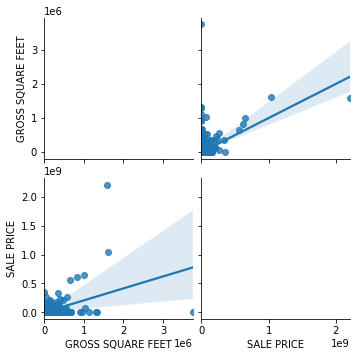

In [5]:
#Go.....
#Linear  regression
x1= "GROSS SQUARE FEET"
y1= "SALE PRICE"
d = df[["GROSS SQUARE FEET", "SALE PRICE"]]
sns.pairplot(d, kind="reg")

In [6]:
inter, slope = thinkstats2.LeastSquares(d[x1],d[y1])
res = thinkstats2.Residuals(d[x1], d[y1], inter, slope)
regLine = thinkstats2.FitLine(d[x1], inter, slope)
print("Y intercept:", inter)
print("Slope:", slope)

Y intercept: 394960.20800829807
Slope: 207.10830766122263


<AxesSubplot:xlabel='GROSS SQUARE FEET', ylabel='SALE PRICE'>

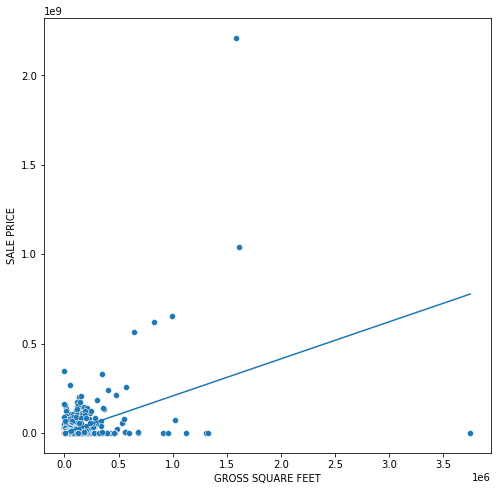

In [7]:
sns.scatterplot(x=d[x1], y=d[y1])
sns.lineplot(x=regLine[0], y=regLine[1])

<AxesSubplot:xlabel='GROSS SQUARE FEET', ylabel='SALE PRICE'>

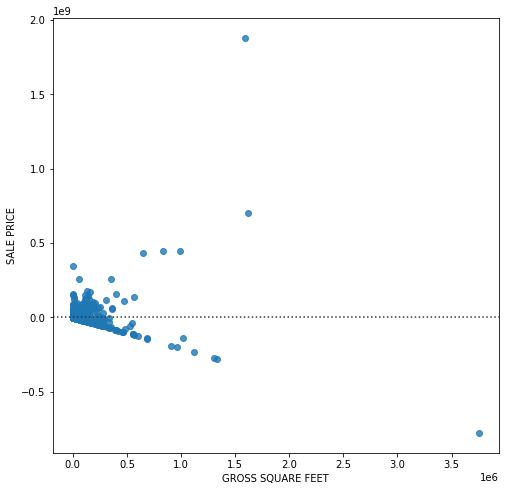

In [8]:
sns.residplot(x=d[x1], y=d[y1])

In [9]:
def rmseFromResiduals(residuals):
    SSE = 0
    for i in range(len(residuals)):
        SSE += (residuals[i]**2)
    MSE = SSE/len(residuals)
    return math.sqrt(MSE)

In [10]:
rmseFromResiduals(res)

11933330.877345582

In [11]:
import statsmodels.api as sm
X2 = sm.add_constant(d[x1])
est = sm.OLS(d[y1], X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             SALE PRICE   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                 1.263e+04
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:24:31   Log-Likelihood:            -8.5465e+05
No. Observations:               48248   AIC:                         1.709e+06
Df Residuals:                   48246   BIC:                         1.709e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               3.95e+05   5.47e+0

In [12]:
ypred = est2.predict(X2)

In [13]:
#Calculate the RMSE,  using the statsmodel function. 
from statsmodels.tools.eval_measures import rmse
rmse(d[y1], ypred)

11933330.87734498

In [14]:
#Sklearn
mean_squared_error(d[y1], ypred, squared=False)

11933330.87734498

In [15]:
def rSquared(yvals, residuals):
    return (1-(thinkstats2.Var(residuals)/thinkstats2.Var(yvals)))

In [16]:
def rSquared_2(yvals, residuals):
    RSS = 0
    TSS = 0
    ybar = yvals.mean()
    for i in range(len(residuals)):
        RSS += (residuals[i]**2)
        TSS += ((yvals[i]-ybar)**2)
    r2 = 1-(RSS/TSS)
    return r2

In [17]:
rSquared_2(d[y1], res)

0.20741035864157753

In [18]:
1-thinkstats2.Corr(d[y1], res)**2

0.20741035864208768

<h2>Part 3 Logistic Regression Loan Status part</h2>

In [25]:
#get the baseline for the Loan status
1 - df["loan_status"].mean()

0.7818360394094718

In [27]:
#split the data
test1, train1 = train_test_split(df,test_size=0.3)

In [29]:
#puting this here insteand of scrolling up agian
df = pd.read_csv("credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [31]:
#use the statsmodel forumla and define it
form = "loan_status ~ person_age + person_income + person_home_ownership + person_emp_length + loan_intent + loan_grade + loan_amnt + loan_int_rate + loan_percent_income + cb_person_default_on_file + cb_person_cred_hist_length"
model1 = sm.logit(data=train1, formula=form).fit()

#Make predictions for later, get summary for now
preds1 = model1.predict(test1)
model1.summary()

         Current function value: 0.334068
         Iterations: 35


C:\Users\Patrick\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                 8586
Model:                          Logit   Df Residuals:                     8563
Method:                           MLE   Df Model:                           22
Date:                Fri, 03 Dec 2021   Pseudo R-squ.:                  0.3642
Time:                        23:03:01   Log-Likelihood:                -2868.3
converged:                      False   LL-Null:                       -4511.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -4.3153      0.371    -11.640      0.000      -5.042      -3.589
person_home_ownership[T.OTHER]     0.5330      0.500      1.066      0.287      -0.447       1.513
person_home_ownership[T.OWN]      -1.8656      0.210     -8.887      0.000      -2.277      -1.454
person_home_ownership[T.RENT]      0.9052      0.079     11.389      0.000       0.749       1.061
loan_intent[T.EDUCATION]          -0.9451      0.112     -8.411      0.000      -1.165      -0.725
loan_intent[T.HOMEIMPROVEMENT]    -0.1176      0.126     -0.930      0.352      -0.365       0.130
loan_intent[T.MEDICAL]            -0.1371      0.106     -1.298      0.194      -0.344       0.070
loan_intent[T.PERSONAL]           -0.6727      0.115     -5.859      0.000      -0.898      -0.448
loan_intent[T.VENTURE]            -1.0437      0.120     -8.730      0.000      -1.278      -0.809
loan_grade[T.B]                    0.0118      0.153      0.077      0.938      -0.287       0.311
loan_grade[T.C]                    0.1021      0.229      0.446      0.656      -0.347       0.551
loan_grade[T.D]                    2.2476      0.288      7.797      0.000       1.683       2.813
loan_grade[T.E]                    2.5405      0.362      7.016      0.000       1.831       3.250
loan_grade[T.F]                    2.9227      0.521      5.615      0.000       1.903       3.943
loan_grade[T.G]                   24.1065   2.05e+04      0.001      0.999   -4.01e+04    4.02e+04
cb_person_default_on_file[T.Y]     0.0014      0.098      0.015      0.988      -0.191       0.194
person_age                        -0.0074      0.011     -0.667      0.505      -0.029       0.014
person_income                   1.658e-06   7.38e-07      2.249      0.025    2.13e-07     3.1e-06
person_emp_length                 -0.0129      0.009     -1.400      0.162      -0.031       0.005
loan_amnt                      -9.521e-05   8.09e-06    -11.767      0.000      -0.000   -7.94e-05
loan_int_rate                      0.1039      0.034      3.091      0.002       0.038       0.170
loan_percent_income               12.7226      0.470     27.098      0.000      11.802      13.643
cb_person_cred_hist_length        -0.0064      0.017     -0.376      0.707      -0.040       0.027
==================================================================================================
"""

In [ ]:
#Get the head of the predictions. 
preds1.head()

In [33]:
def convert_prob_to_label(prob, cutoff = 0.5):
    label = []
    for i in range(len(prob)):
        if prob[i] > cutoff:
            label.append(1)
        else:
            label.append(0)
    return label

In [34]:
labels = convert_prob_to_label(np.array(preds1))

In [ ]:
#I comment out the confusion matrix because it does not work
#from sklearn.metrics import confusion_matrix
#conf_matrix = confusion_matrix(test1["Outcome"], labels)
#sns.heatmap(conf_matrix, annot=True)

In [43]:
#Use these 2 meterics becuase the confusion matrick does not work
print("Acc%:", accuracy_score(test1["loan_status"], labels))
print("F1:", f1_score(test1["loan_status"], labels))

Acc%: 0.8560028062790493
F1: 0.5960639606396063


<h2>Part 4 talking about the model part is it good or nah?</h2>
<p>I personally don't think my models is good for either one becuase for the logistic regression I could not get a visual chart displaying so the person seeing this might not understand the loan status </p>
<p>As for the linear regression I felt my graph is a kinda hard to read becuase all the dots are all cluster togther  because I have a feeling my data is not clean or the numbers are too big.</p>